# Loading external data
### Type: Odorant receptors

Mainland et al, *Scientific Data*, 2015

![alt text](images/odor-receptors.jpg)

In [1]:
import pandas as pd

In [2]:
odors = pd.read_csv('data/Odors.tsv',delimiter='\t',index_col='Odor').dropna()
odors['CID'] = odors['CID'].astype('int')
odors.head()

,CASRegistryNum,OdorName,CID,SMILES
Odor,,,,
1024,2244-16-8,(+)-carvone,16724,CC1=CC[C@@H](CC1=O)C(=C)C
1025,6485-40-1,(-)-carvone,439570,CC1=CC[C@H](CC1=O)C(=C)C
1064,111-71-7,heptaldehyde,8130,CCCCCCC=O
1067,111-14-8,heptanoic acid,8094,CCCCCCC(=O)O
1069,79-09-4,propionic acid,1032,CCC(=O)O


<hr>

![alt text](images/carvone.png)

### (+)-carvone:
![alt text](images/caraway-seeds.jpg)

### (-)-carvone:
![alt text](images/mint.jpg)

### Q: What if you walked through a mirror?
<img align="left" src="images/mickey.png">

### A1: Spearmint would smell like caraway, and vice versa!
### A2: Oranges would smell like pine needles, and vice versa!

<hr>
## Let's load the rest of the data

In [3]:
receptors = pd.read_csv('data/Receptors.tsv',delimiter='\t',index_col='OR')
receptors.head()

,Gene,NucleotideSeq
OR,,
999,Vector control,NaN
1024,OR10K1,ATGGAGCAAGTCAATAAGACTGTGGTGAGAGAGTTCGTCGTCCTCG...
1025,OR6Y1 V252I,ATGACCACCATAATTCTGGAAGTAGATAATCATACAGTGACAACAC...
1026,OR10Z1,ATGGGGCAGACCAACGTAACCTCCTGGAGGGATTTTGTCTTCCTGG...
1027,OR6N2,ATGGATCAATACAACCATTCAAGCCTGGCTGAATTTGTGTTCCTTG...


In [4]:
dose_response = pd.read_csv('data/DR.tsv',delimiter='\t')
dose_response.head()

,OR,concentration,NormalizedLuc,Odor,Date
0,1030,0.000001,0.277011,1341,120710
1,1030,0.001000,0.535902,1341,120710
2,1030,0.000100,0.503810,1316,111810
3,1030,0.001000,0.838039,1341,120710
4,1030,0.000010,0.313976,1316,111810


In [5]:
dose_response = pd.read_csv('data/DR.tsv',delimiter='\t').sort_values(['OR','Odor','Date','concentration'])\
                                                         .set_index(['OR','Odor']).sort_index()
dose_response.head()

concentration  NormalizedLuc   Date
OR  Odor                                     
999 1024   1.000000e-12       0.240312  11911
    1024   1.000000e-12       0.312463  11911
    1024   1.000000e-12       0.252089  11911
    1024   1.000000e-08       0.216773  11911
    1024   1.000000e-08       0.197580  11911

In [6]:
dose_response_mean = dose_response.groupby(['Odor','OR','concentration']).mean()
dose_response_mean.head(25)

NormalizedLuc          Date
Odor OR   concentration                             
1024 999  1.000000e-12        0.280447  54425.142857
          1.000000e-08        0.255621  51550.800000
          1.371742e-08        0.225753  70811.000000
          1.371742e-08        0.233691  52411.000000
          4.115226e-08        0.300748  70811.000000
          4.115226e-08        0.218337  52411.000000
          1.000000e-07        0.238344  51550.800000
          1.234568e-07        0.221844  52411.000000
          1.234568e-07        0.290324  70811.000000
          3.703704e-07        0.214356  52411.000000
          3.703704e-07        0.255444  70811.000000
          1.000000e-06        0.172423  51550.800000
          1.111111e-06        0.235441  70811.000000
          1.111111e-06        0.221349  52411.000000
          3.333333e-06        0.188627  70811.000000
          3.333333e-06        0.218822  52411.000000
          1.000000e-05        0.182900  54425.142857
          1.000000e-04        0.158566  51550.800000
          1.000000e-03        0.201294  51550.800000
          1.000000e-02        0.477851  51550.800000
     1528 1.000000e-12        2.012425  22211.000000
          1.000000e-08        3.294213  22211.000000
          1.000000e-07        5.264023  22211.000000
          1.000000e-06        7.525514  22211.000000
          1.000000e-05        9.413434  22211.000000

In [7]:
dose_response_mean_sorted = dose_response_mean.drop('Date',axis=1).sort_index(level=['Odor','OR','concentration'])
dose_response_mean_sorted.head(25)

NormalizedLuc
Odor OR   concentration               
1024 999  1.000000e-12        0.280447
          1.000000e-08        0.255621
          1.371742e-08        0.225753
          1.371742e-08        0.233691
          4.115226e-08        0.300748
          4.115226e-08        0.218337
          1.000000e-07        0.238344
          1.234568e-07        0.221844
          1.234568e-07        0.290324
          3.703704e-07        0.214356
          3.703704e-07        0.255444
          1.000000e-06        0.172423
          1.111111e-06        0.235441
          1.111111e-06        0.221349
          3.333333e-06        0.188627
          3.333333e-06        0.218822
          1.000000e-05        0.182900
          1.000000e-04        0.158566
          1.000000e-03        0.201294
          1.000000e-02        0.477851
     1528 1.000000e-12        2.012425
          1.000000e-08        3.294213
          1.000000e-07        5.264023
          1.000000e-06        7.525514
          1.000000e-05        9.413434

In [8]:
dose_response_mean_sorted.unstack().transpose().head(10)

Odor                             1024                                          \
OR                               999       1528      1529      1530      1531   
              concentration                                                     
NormalizedLuc 1.000000e-14        NaN       NaN       NaN       NaN       NaN   
              1.000000e-12   0.280447  2.012425  4.450075  4.290100  2.357799   
              1.000000e-10        NaN       NaN       NaN       NaN       NaN   
              1.000000e-09        NaN       NaN       NaN       NaN       NaN   
              1.371742e-09        NaN       NaN       NaN       NaN       NaN   
              4.115226e-09        NaN       NaN       NaN       NaN       NaN   
              1.000000e-08   0.255621  3.294213  6.335096  6.061722  3.484841   
              1.234568e-08        NaN       NaN       NaN       NaN       NaN   
              1.371742e-08   0.225753       NaN  3.493483  3.210537  1.713731   
              1.371742e-08   0.233691       NaN       NaN       NaN       NaN   

Odor                                       1025                                \
OR                               1727      999       1227      1440      1529   
              concentration                                                     
NormalizedLuc 1.000000e-14        NaN       NaN       NaN       NaN       NaN   
              1.000000e-12   0.389366  0.272879  0.310266  0.248615  7.331147   
              1.000000e-10        NaN       NaN       NaN       NaN       NaN   
              1.000000e-09        NaN       NaN       NaN       NaN       NaN   
              1.371742e-09        NaN       NaN       NaN       NaN       NaN   
              4.115226e-09        NaN       NaN       NaN       NaN       NaN   
              1.000000e-08   0.467296  0.294014  0.280777  0.221961  6.598060   
              1.234568e-08        NaN       NaN       NaN       NaN       NaN   
              1.371742e-08        NaN       NaN       NaN       NaN       NaN   
              1.371742e-08   0.205646       NaN       NaN       NaN       NaN   

Odor                           ...         1412                1414            \
OR                             ...         999       1281      999       1371   
              concentration    ...                                              
NormalizedLuc 1.000000e-14     ...          NaN       NaN       NaN       NaN   
              1.000000e-12     ...     0.228147  0.176475  0.352165  0.221015   
              1.000000e-10     ...          NaN       NaN       NaN       NaN   
              1.000000e-09     ...          NaN       NaN       NaN       NaN   
              1.371742e-09     ...          NaN       NaN       NaN       NaN   
              4.115226e-09     ...          NaN       NaN       NaN       NaN   
              1.000000e-08     ...     0.187907  0.170430  0.290572  0.181477   
              1.234568e-08     ...          NaN       NaN       NaN       NaN   
              1.371742e-08     ...          NaN       NaN       NaN       NaN   
              1.371742e-08     ...          NaN       NaN       NaN       NaN   

Odor                                                 1416                      \
OR                               1575      1698      1073      1411      1650   
              concentration                                                     
NormalizedLuc 1.000000e-14        NaN       NaN       NaN       NaN       NaN   
              1.000000e-12   0.213272  0.238498  0.305240  0.249295  0.227298   
              1.000000e-10        NaN       NaN       NaN       NaN       NaN   
              1.000000e-09        NaN       NaN       NaN       NaN       NaN   
              1.371742e-09        NaN       NaN       NaN       NaN       NaN   
              4.115226e-09        NaN       NaN       NaN       NaN       NaN   
              1.000000e-08   0.176228  0.233708  0.670966  0.647808  0.258789   
              1.234568e-08  

### Extract just one odor/receptor combination

In [9]:
one_series = dose_response_mean_sorted.loc[1024].loc[1528]
one_series

,NormalizedLuc
concentration,
1.000000e-12,2.012425
1.000000e-08,3.294213
1.000000e-07,5.264023
1.000000e-06,7.525514
1.000000e-05,9.413434
1.000000e-04,7.659271
1.000000e-03,NaN
1.000000e-02,NaN


### Plot it

In [10]:
ax = one_series.dropna().plot(marker='o')
ax.set_xscale('log') # Plot x-axis on a log scale

### Let's clean it up

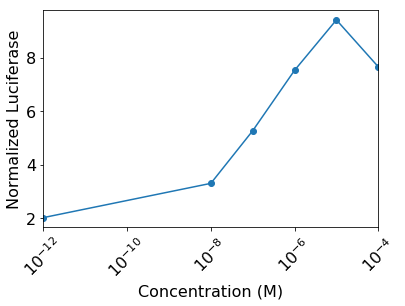

In [11]:
# Change plot defaults
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

# Replot
ax = one_series.dropna().plot(marker='o')
ax.set_xscale('log')
ax.set_xlabel('Concentration (M)') # Change x-axis label
ax.set_ylabel('Normalized Luciferase') # Change y-axis label
for tick in ax.get_xticklabels(): # For every tick label...
    tick.set_rotation(45) # ...rotate it by 45 degrees
ax.legend().remove() # Get rid of that dumb figure legend

## Now let's combined datasets

In [12]:
dose_response

concentration  NormalizedLuc   Date
OR   Odor                                     
999  1024   1.000000e-12       0.240312  11911
     1024   1.000000e-12       0.312463  11911
     1024   1.000000e-12       0.252089  11911
     1024   1.000000e-08       0.216773  11911
     1024   1.000000e-08       0.197580  11911
     1024   1.000000e-08       0.197625  11911
     1024   1.000000e-07       0.178992  11911
     1024   1.000000e-07       0.227478  11911
     1024   1.000000e-07       0.162837  11911
     1024   1.000000e-06       0.140388  11911
     1024   1.000000e-06       0.122558  11911
     1024   1.000000e-06       0.124783  11911
     1024   1.000000e-05       0.133458  11911
     1024   1.000000e-05       0.104621  11911
     1024   1.000000e-05       0.131377  11911
     1024   1.000000e-04       0.158359  11911
     1024   1.000000e-04       0.134968  11911
     1024   1.000000e-04       0.119737  11911
     1024   1.000000e-03       0.269981  11911
     1024   1.000000e-03       0.227073  11911
     1024   1.000000e-03       0.198049  11911
     1024   1.000000e-02       0.200919  11911
     1024   1.000000e-02       0.395143  11911
     1024   1.000000e-02       0.380165  11911
     1024   1.000000e-12       0.420023  22211
     1024   1.000000e-12       0.317510  22211
     1024   1.000000e-12       0.322358  22211
     1024   1.000000e-08       0.310963  22211
     1024   1.000000e-08       0.283045  22211
     1024   1.000000e-08       0.299374  22211
...                  ...            ...    ...
1781 1388   1.000000e-03      12.002530  22211
     1388   1.000000e-03      13.608967  22211
     1388   1.000000e-03      14.380171  22211
     1388   1.000000e-02            NaN  22211
     1388   1.000000e-02            NaN  22211
     1388   1.000000e-02            NaN  22211
1784 1300   1.000000e-12       0.575060  52411
     1300   1.000000e-12       0.518268  52411
     1300   1.000000e-12       0.596465  52411
     1300   1.000000e-08       0.610358  52411
     1300   1.000000e-08       0.659341  52411
     1300   1.000000e-08       0.579795  52411
     1300   1.000000e-07       0.791667  52411
     1300   1.000000e-07       0.704160  52411
     1300   1.000000e-07       0.677372  52411
     1300   1.000000e-06       0.852239  52411
     1300   1.000000e-06       0.728314  52411
     1300   1.000000e-06       0.913194  52411
     1300   1.000000e-05       1.167862  52411
     1300   1.000000e-05       1.078212  52411
     1300   1.000000e-05       0.910632  52411
     1300   1.000000e-04       1.247834  52411
     1300   1.000000e-04       1.624382  52411
     1300   1.000000e-04       1.108271  52411
     1300   1.000000e-03       1.681185  52411
     1300   1.000000e-03       1.496732  52411
     1300   1.000000e-03       1.390445  52411
     1300   1.000000e-02       1.785124  52411
     1300   1.000000e-02       1.513158  52411
     1300   1.000000e-02       1.975904  52411

[22362 rows x 3 columns]

In [13]:
dose_response = pd.read_csv('data/DR.tsv',delimiter='\t').set_index('Odor')
dose_response.join(odors).head()

,OR,concentration,NormalizedLuc,Date,CASRegistryNum,OdorName,CID,SMILES
Odor,,,,,,,,
1024,1528,1.000000e-03,NaN,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C
1024,1528,1.000000e-05,9.510141,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C
1024,1528,1.000000e-04,6.986136,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C
1024,1528,1.000000e-07,5.220539,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C
1024,1528,1.000000e-06,7.665477,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C


In [14]:
dose_response.set_index('OR').head(5)

,concentration,NormalizedLuc,Date
OR,,,
1030,0.000001,0.277011,120710
1030,0.001000,0.535902,120710
1030,0.000100,0.503810,111810
1030,0.001000,0.838039,120710
1030,0.000010,0.313976,111810


In [15]:
joined = dose_response.join(odors).set_index('OR').join(receptors)
joined.head()

,concentration,NormalizedLuc,Date,CASRegistryNum,OdorName,CID,SMILES,Gene,NucleotideSeq
OR,,,,,,,,,
999,1.000000e-12,0.420023,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C,Vector control,NaN
999,1.000000e-08,0.310963,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C,Vector control,NaN
999,1.000000e-07,0.326847,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C,Vector control,NaN
999,1.000000e-06,0.243413,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C,Vector control,NaN
999,1.000000e-05,0.359301,22211,2244-16-8,(+)-carvone,16724.0,CC1=CC[C@@H](CC1=O)C(=C)C,Vector control,NaN


In [16]:
joined.set_index(['OdorName','Gene'])[['concentration','NormalizedLuc','Date']]

concentration  NormalizedLuc  \
OdorName                   Gene                                           
(+)-carvone                Vector control   1.000000e-12       0.420023   
                           Vector control   1.000000e-08       0.310963   
                           Vector control   1.000000e-07       0.326847   
                           Vector control   1.000000e-06       0.243413   
                           Vector control   1.000000e-05       0.359301   
                           Vector control   1.000000e-04       0.276730   
                           Vector control   1.000000e-03            NaN   
                           Vector control   1.000000e-02            NaN   
                           Vector control   1.000000e-05       0.216453   
                           Vector control   1.000000e-12       0.284142   
                           Vector control   1.000000e-12       0.328941   
                           Vector control   1.000000e-08       0.358694   
                           Vector control   1.000000e-07       0.313155   
                           Vector control   1.000000e-06       0.209185   
                           Vector control   1.000000e-05       0.150108   
                           Vector control   1.000000e-04       0.174610   
                           Vector control   1.000000e-03       0.167321   
                           Vector control   1.000000e-02       0.567204   
                           Vector control   1.000000e-12       0.385778   
                           Vector control   1.000000e-08       0.385279   
                           Vector control   1.000000e-07       0.355726   
                           Vector control   1.000000e-06       0.223809   
                           Vector control   1.000000e-05       0.158967   
                           Vector control   1.000000e-04       0.137797   
                           Vector control   1.000000e-03       0.215134   
                           Vector control   1.000000e-02       0.613982   
                           Vector control   1.000000e-12       0.336449   
                           Vector control   1.000000e-08       0.344729   
                           Vector control   1.000000e-07       0.217053   
                           Vector control   1.000000e-06       0.196850   
...                                                  ...            ...   
3-phenyl propyl propionate OR10A6 L287P     1.000000e-06      13.394794   
                           OR10A6 L287P     1.000000e-05      15.067140   
                           OR10A6 L287P     1.000000e-07      13.454060   
                           OR10A6 L287P     1.000000e-02            NaN   
                           OR10A6 L287P     1.000000e-03      14.380171   
                           OR10A6 L287P     1.000000e-04      14.412396   
cis-3-hexen-1-ol           OR2J3            1.000000e-12       0.575060   
                           OR2J3            1.000000e-02       1.785124   
                           OR2J3            1.000000e-03       1.681185   
                           OR2J3            1.000000e-02       1.513158   
                           OR2J3            1.000000e-06       0.852239   
                           OR2J3            1.000000e-03       1.496732   
                           OR2J3            1.000000e-07       0.791667   
                           OR2J3            1.000000e-02       1.975904   
                           OR2J3            1.000000e-05       1.167862   
                           OR2J3            1.000000e-08       0.610358   
                           OR2J3            1.000000e-03       1.390445   
                           OR2J3            1.000000e-04       1.247834   
                           OR2J3            1.000000e-12       0.518268   
                           OR2J3            1.000000e-04       1.624382   
                           OR2J3            1.000000e-05       1.078